In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

## Handling Missing Data

In [4]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [5]:
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)

C:\Users\Anik Majumdar\AppData\Local\Temp\ipykernel_25588\2565423284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)


In [6]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

C:\Users\Anik Majumdar\AppData\Local\Temp\ipykernel_25588\4239780594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Feature Engineering

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [10]:
categorical_columns = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','bore','stroke','horsepower','peak-rpm']

In [11]:
encoded_data = encoder.fit_transform(df[categorical_columns])

In [12]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [13]:
df2 = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [14]:
df2.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,peak-rpm_?
0,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,121.836364,94.5,171.2,65.5,52.4,2823,152,9.0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,24,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,18,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 215 entries, symboling to peak-rpm_?
dtypes: float64(209), int64(6)
memory usage: 339.4 KB


In [16]:
df2.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
                    ..
peak-rpm_5800        0
peak-rpm_5900        0
peak-rpm_6000        0
peak-rpm_6600        0
peak-rpm_?           0
Length: 215, dtype: int64

In [17]:
df2.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,peak-rpm_?
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.00000,202.000000,202.000000,202.00000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,...,0.034653,0.00495,0.059406,0.178218,0.00495,0.034653,0.014851,0.044554,0.009901,0.009901
std,1.258360,31.972982,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,...,0.183355,0.07036,0.236970,0.383647,0.07036,0.183355,0.121259,0.206836,0.099256,0.099256
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,98.750000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,121.836364,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,137.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,...,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df2.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       ...
       'peak-rpm_5250', 'peak-rpm_5300', 'peak-rpm_5400', 'peak-rpm_5500',
       'peak-rpm_5600', 'peak-rpm_5800', 'peak-rpm_5900', 'peak-rpm_6000',
       'peak-rpm_6600', 'peak-rpm_?'],
      dtype='object', length=215)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
df_scaled = scaler.fit_transform(df2)

In [22]:
df_scaled = pd.DataFrame(df_scaled, columns=df2.columns)

In [23]:
df_scaled

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,peak-rpm_?
0,1.0,0.297573,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.12500,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.297573,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.12500,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,0.297573,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.12500,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.18750,0.305556,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.06250,0.138889,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.2,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.10625,0.166667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.2,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.11250,0.138889,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.2,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,1.00000,0.361111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,0.2,0.157068,0.655977,0.711940,0.735043,0.641667,0.610551,0.301887,0.15625,0.166667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_scaled.shape

(202, 215)

In [25]:
df_scaled.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,peak-rpm_?
symboling,1.000000,4.689180e-01,-0.541598,-0.370773,-0.250262,-0.551691,-0.238419,-0.112429,-0.180012,-0.028289,...,0.219472,-0.102926,-0.299985,0.186111,-0.046734,-0.082409,2.120947e-01,0.162761,0.013409,1.340913e-02
normalized-losses,0.468918,1.000000e+00,-0.063653,0.013715,0.079667,-0.375560,0.094119,0.109808,-0.113848,-0.219377,...,-0.029579,-0.059350,-0.182892,0.269748,0.086612,-0.001574,1.732601e-17,0.022925,0.144742,1.863460e-17
wheel-base,-0.541598,-6.365282e-02,1.000000,0.876689,0.816586,0.591751,0.782893,0.570654,0.247128,-0.474246,...,-0.016189,0.118945,0.221586,-0.160923,0.106183,-0.031326,-1.887955e-01,-0.163522,-0.071520,-4.520202e-02
length,-0.370773,1.371493e-02,0.876689,1.000000,0.858237,0.493897,0.881257,0.684445,0.158193,-0.666999,...,0.091486,0.083278,0.212462,-0.210945,0.071240,-0.011248,-5.362096e-02,-0.248367,-0.045297,3.963611e-02
width,-0.250262,7.966682e-02,0.816586,0.858237,1.000000,0.309088,0.866690,0.727941,0.187716,-0.635681,...,0.015097,0.097193,0.174905,-0.079661,0.080413,-0.108536,-5.280977e-02,-0.120280,-0.090592,3.073901e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peak-rpm_5800,-0.082409,-1.573858e-03,-0.031326,-0.011248,-0.108536,0.011912,-0.076130,-0.080258,-0.057911,0.008283,...,-0.035897,-0.013364,-0.047615,-0.088233,-0.013364,1.000000,-2.326300e-02,-0.040914,-0.018947,-1.894662e-02
peak-rpm_5900,0.212095,1.732601e-17,-0.188796,-0.053621,-0.052810,-0.109517,0.050567,0.199095,-0.020364,-0.156179,...,-0.023263,-0.008660,-0.030857,-0.057178,-0.008660,-0.023263,1.000000e+00,-0.026514,-0.012278,-1.227818e-02
peak-rpm_6000,0.162761,2.292482e-02,-0.163522,-0.248367,-0.120280,-0.165067,-0.168788,-0.227745,-0.047254,-0.031225,...,-0.040914,-0.015232,-0.054270,-0.100563,-0.015232,-0.040914,-2.651409e-02,1.000000,-0.021594,-2.159447e-02
peak-rpm_6600,0.013409,1.447420e-01,-0.071520,-0.045297,-0.090592,-0.048191,-0.053430,-0.069997,-0.019095,0.013292,...,-0.018947,-0.007053,-0.025131,-0.046569,-0.007053,-0.018947,-1.227818e-02,-0.021594,1.000000,-1.000000e-02


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
selected_features=['normalized-losses','wheel-base','engine-size','city-mpg','highway-mpg','price']

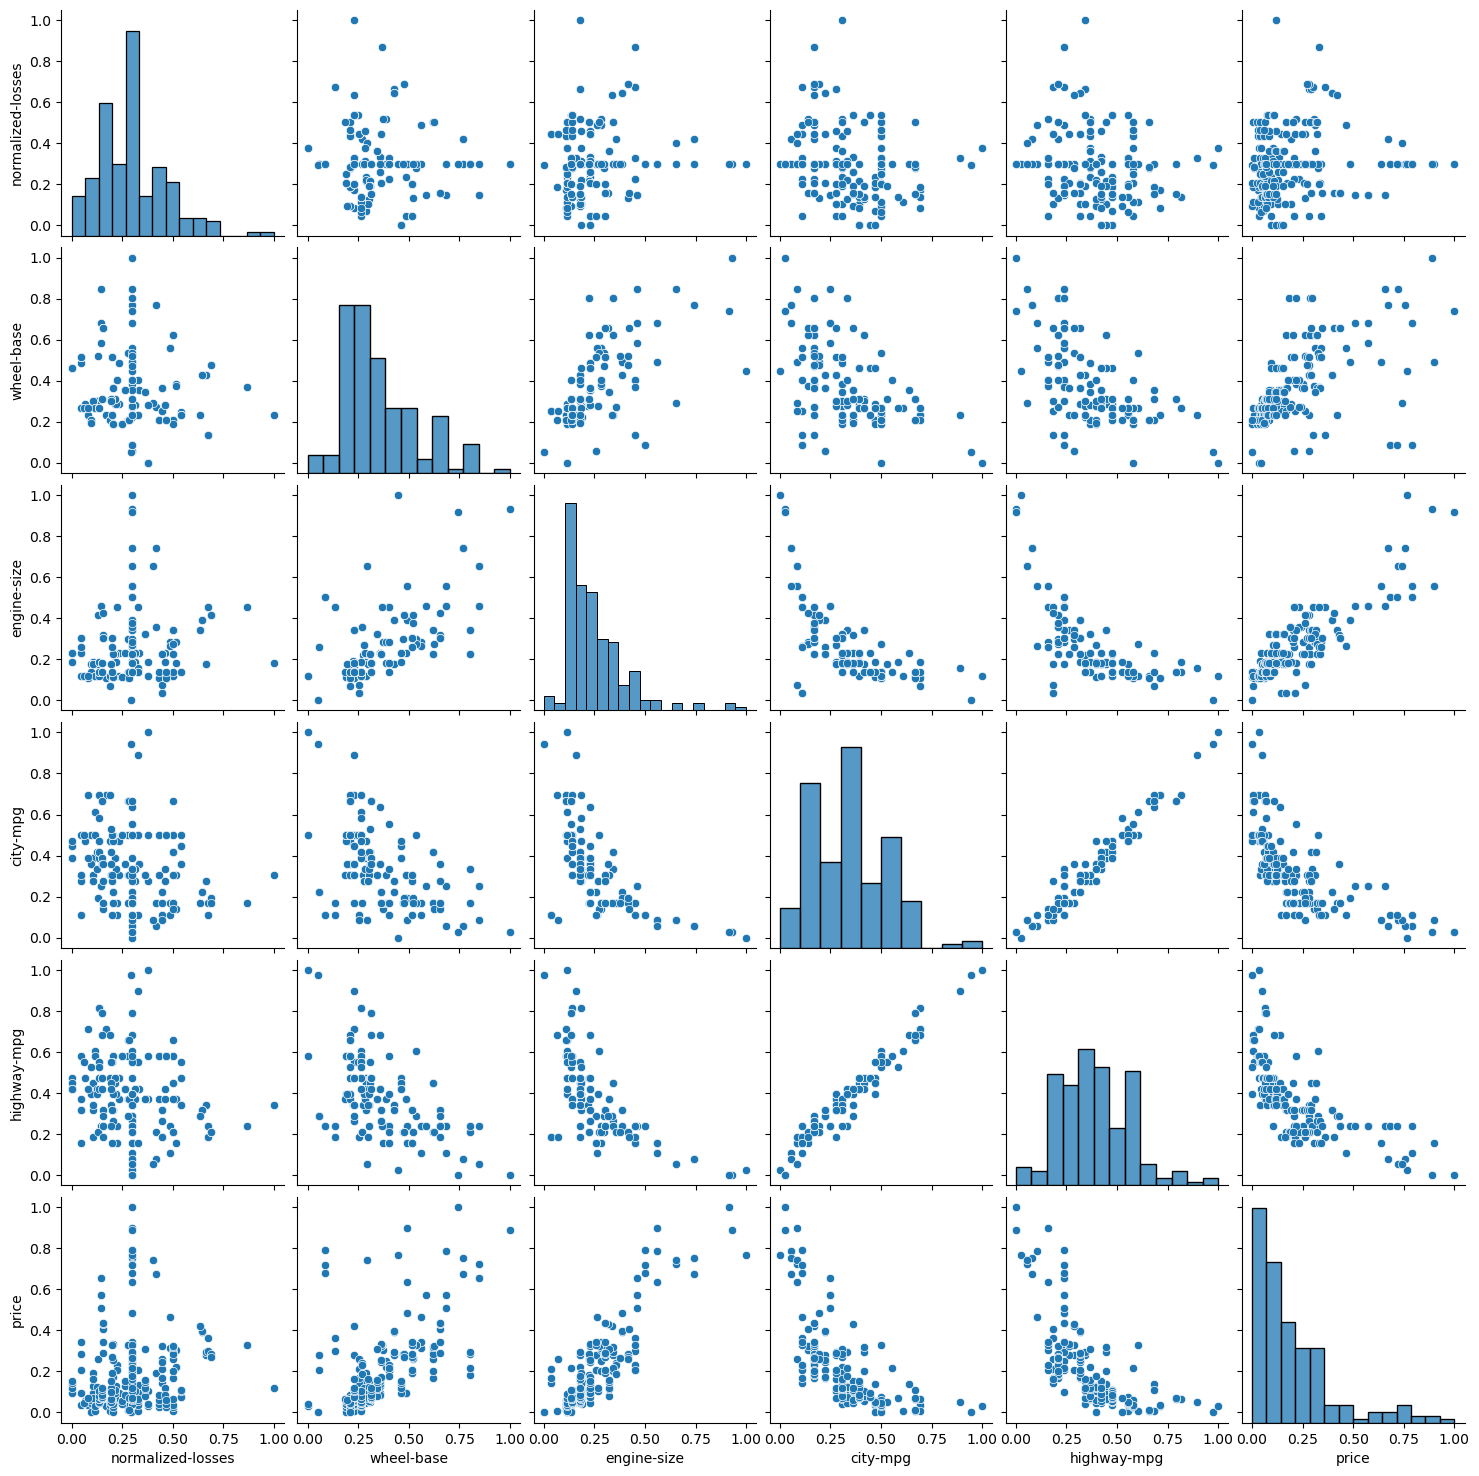

In [28]:
sns.pairplot(df_scaled[selected_features])
plt.show()

## Training

In [29]:
df_scaled.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       ...
       'peak-rpm_5250', 'peak-rpm_5300', 'peak-rpm_5400', 'peak-rpm_5500',
       'peak-rpm_5600', 'peak-rpm_5800', 'peak-rpm_5900', 'peak-rpm_6000',
       'peak-rpm_6600', 'peak-rpm_?'],
      dtype='object', length=215)

In [30]:
columns_list = list(df_scaled.columns)

In [31]:
columns_list

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg',
 'price',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel-type_gas',
 'aspiration_turbo',
 'num-of-doors_two',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'drive-wheels_fwd',
 'drive-wheels_rwd',
 'engine-location_rear',
 'engine-type_l',
 'engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_rotor',
 'num-of-cylinders_five',
 'num-of-cylinders_four',
 'num-of-cylinders_six',
 'num-of-cylinders_three',
 'num-of-cylinders_twelve',
 'num-of-cylinders_two',
 

In [32]:
X = df_scaled.drop(columns=['price'],axis=1)

In [33]:
Y=df_scaled[['price']]

In [34]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,peak-rpm_?
0,1.0,0.297573,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.1250,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.297573,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.1250,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,0.297573,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.1250,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.1875,0.305556,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.0625,0.138889,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
Y.head()

,price
0,0.207959
1,0.282558
2,0.282558
3,0.219254
4,0.306142


In [36]:
X.shape

(202, 214)

In [37]:
Y.shape

(202, 1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [40]:
X_train.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,peak-rpm_?
199,0.2,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,1.00000,0.361111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.4,0.104712,0.288630,0.511940,0.418803,0.525000,0.316524,0.184906,0.12500,0.388889,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24,0.6,0.434555,0.206997,0.241791,0.299145,0.233333,0.194337,0.109434,0.15000,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122,1.0,0.633508,0.230321,0.414925,0.683761,0.200000,0.500388,0.339623,0.15625,0.166667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.2,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.10625,0.166667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
Y_train.head()

,price
199,0.430763
38,0.092523
24,0.039075
122,0.419542
197,0.345738


In [42]:
X_train.shape

(161, 214)

In [43]:
Y_train.shape

(161, 1)

In [44]:
X_test.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,peak-rpm_?
95,0.8,0.539267,0.247813,0.317910,0.299145,0.458333,0.201707,0.135849,0.15000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.4,0.297573,0.492711,0.786567,0.649573,0.491667,0.733902,0.558491,0.06250,0.083333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.8,0.376963,0.000000,0.052239,0.307692,0.250000,0.128394,0.116981,0.13750,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
159,0.6,0.539267,0.230321,0.411940,0.316239,0.400000,0.264158,0.139623,0.12500,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,1.0,1.000000,0.230321,0.367164,0.316239,0.300000,0.284329,0.181132,0.09375,0.305556,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
X_test.shape

(41, 214)

In [46]:
Y_test.head()

,price
95,0.077727
15,0.898590
30,0.043121
159,0.072985
186,0.120699


In [47]:
Y_test.shape

(41, 1)

## KNN for Regression

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn_r = KNeighborsRegressor()

In [50]:
knn_r.fit(X_train,Y_train)

KNeighborsRegressor()

In [51]:
knn_y_pred=knn_r.predict(X_test)

In [52]:
knn_y_pred

array([[0.0422273 ],
       [0.44017179],
       [0.04536518],
       [0.07417705],
       [0.14108038],
       [0.02068418],
       [0.53257038],
       [0.13304702],
       [0.19890274],
       [0.49232908],
       [0.51264088],
       [0.04111017],
       [0.14822005],
       [0.0596743 ],
       [0.31989474],
       [0.27913212],
       [0.10021846],
       [0.07417705],
       [0.07214637],
       [0.65108485],
       [0.43424358],
       [0.44017179],
       [0.14366218],
       [0.03999305],
       [0.35604488],
       [0.15211261],
       [0.10297403],
       [0.37548285],
       [0.15825927],
       [0.09912616],
       [0.31787895],
       [0.03688   ],
       [0.20277047],
       [0.02068418],
       [0.14822005],
       [0.26763815],
       [0.04559357],
       [0.06963408],
       [0.14822005],
       [0.11772007],
       [0.19589395]])

## KNN Regression Train Accuracy

In [53]:
knn_r.score(X_train,Y_train)

0.7967482359776867

## KNN Regression Test Accuracy

In [54]:
knn_r.score(X_test,Y_test)

0.734350194146934

## Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge_reg=Ridge()

In [57]:
ridge_reg.fit(X_train,Y_train)

Ridge()

In [58]:
ridge_reg_y_predict=ridge_reg.predict(X_test)

In [59]:
ridge_reg_y_predict

array([[0.09278381],
       [0.59457004],
       [0.02203159],
       [0.11047416],
       [0.12411031],
       [0.00762511],
       [0.60463897],
       [0.13081285],
       [0.1207177 ],
       [0.65664078],
       [0.54126008],
       [0.05631012],
       [0.20652812],
       [0.09143383],
       [0.32328677],
       [0.33976473],
       [0.12092689],
       [0.0580065 ],
       [0.09957463],
       [0.61688353],
       [0.67197296],
       [0.64144442],
       [0.14175146],
       [0.05411783],
       [0.50658514],
       [0.15493378],
       [0.13837002],
       [0.54701986],
       [0.1324776 ],
       [0.09090471],
       [0.28986862],
       [0.03395689],
       [0.24596419],
       [0.04100036],
       [0.20064029],
       [0.23728137],
       [0.05604796],
       [0.08126481],
       [0.15340184],
       [0.06979586],
       [0.1976049 ]])

## Ridge Regression Train Accuracy

In [60]:
ridge_reg.score(X_train,Y_train)

0.9746728699201554

## Ridge Regression Test Accuracy

In [61]:
ridge_reg.score(X_test,Y_test)

0.9234437571913944

## Lasso Regression

In [62]:
from sklearn.linear_model import Lasso

In [63]:
lasso_reg = Lasso(alpha=0.001)

In [64]:
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.001)

In [65]:
lasso_reg_y_predict=lasso_reg.predict(X_test)

In [66]:
lasso_reg_y_predict

array([0.04163438, 0.53768784, 0.02539222, 0.09746416, 0.09653562,
       0.02621104, 0.60044392, 0.14553297, 0.1321122 , 0.60640695,
       0.50621593, 0.03028548, 0.23329278, 0.10583818, 0.28942029,
       0.32748743, 0.11771189, 0.03182163, 0.1255585 , 0.61307553,
       0.62087759, 0.5686118 , 0.1306436 , 0.03969538, 0.50559299,
       0.13858299, 0.13627162, 0.53200163, 0.18289281, 0.10693797,
       0.23708835, 0.02306487, 0.22813611, 0.03836489, 0.22579879,
       0.25445834, 0.06860905, 0.09676917, 0.20880356, 0.07533664,
       0.21210022])

## Lasso Regression Train Accuracy

In [67]:
lasso_reg.score(X_train,Y_train)

0.9383432973963922

## Lasso Regression Test Accuracy

In [68]:
lasso_reg.score(X_test,Y_test)

0.8752962946731335

## Model Evaluation

Comparison of Test Accuracies of Different Models

In [69]:
model_names = ['KNN Regression', 'Ridge Regression', 'Lasso Regression']

In [70]:
test_accuracies = [knn_r.score(X_test,Y_test), ridge_reg.score(X_test,Y_test), lasso_reg.score(X_test,Y_test)]

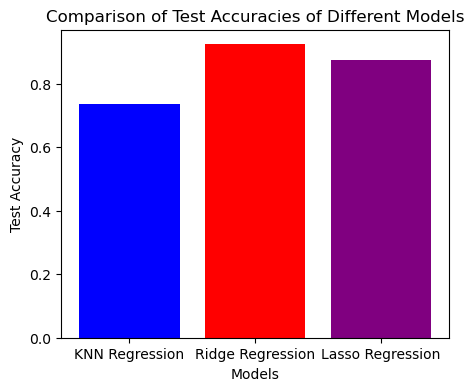

In [71]:
plt.figure(figsize=(5, 4))
plt.bar(model_names, test_accuracies, color=['blue', 'red', 'purple'])
plt.title('Comparison of Test Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.show()